In [1]:
import sys
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
from search.search_local import search_phase_space
from sample_near_gaia import load_mock_data
from sample import load_samples
from tools.tools import rect_to_cyl
from scipy import stats

In [2]:
dehnendf_data = rect_to_cyl(*load_mock_data(0,0,0,3,parallax_cut=False).T)
gaia_data = rect_to_cyl(*search_phase_space(0,0,0,0,0,0,3,0).T)

../..\search\search_local.py:151: RuntimeWarning: invalid value encountered in less
  (V - V0)**2 + (W - W0)**2) * v_scale**2) < epsilon**2



In [3]:
dvR, dvz = dehnendf_data.T[[1,4]]
gvR, gvz = gaia_data.T[[1,4]]

dmask = (np.abs(dvR-np.mean(dvR)) < 3*np.std(dvR)) & (np.abs(dvz-np.mean(dvz)) < 3*np.std(dvz))
gmask = (np.abs(gvR-np.mean(gvR)) < 3*np.std(gvR)) & (np.abs(gvz-np.mean(gvz)) < 3*np.std(gvz))

dvR = dvR[dmask]
dvz = dvz[dmask]
gvR = gvR[gmask]
gvz = gvz[gmask]

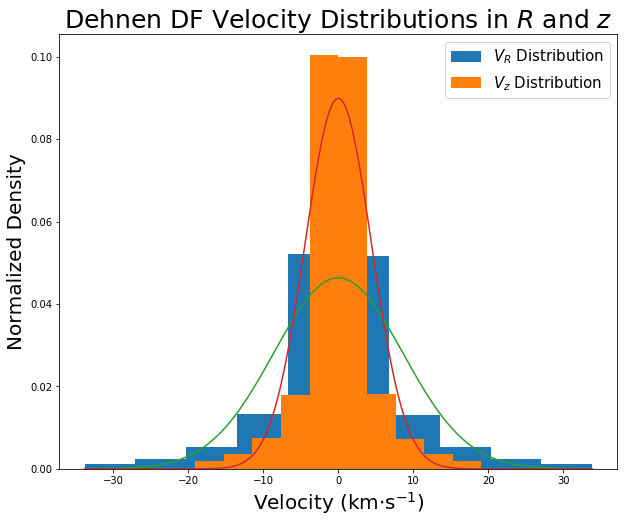

In [4]:
x = np.linspace(np.min(dvR), np.max(dvR), 10000)
dvR_normal = stats.norm.pdf(x, np.mean(dvR), np.std(dvR))
dvz_normal = stats.norm.pdf(x, np.mean(dvz), np.std(dvz))

plt.figure(figsize=(10,8))

plt.hist(dvR, normed=True,label='$V_R$ Distribution')
plt.hist(dvz, normed=True,label='$V_z$ Distribution')
plt.plot(x, dvR_normal)
plt.plot(x, dvz_normal)

plt.title("Dehnen DF Velocity Distributions in $R$ and $z$",fontsize=25)
plt.xlabel("Velocity (km$\cdot$s$^{-1}$)",fontsize=20)
plt.ylabel("Normalized Density",fontsize=20)
plt.legend(fontsize=15)

plt.show()

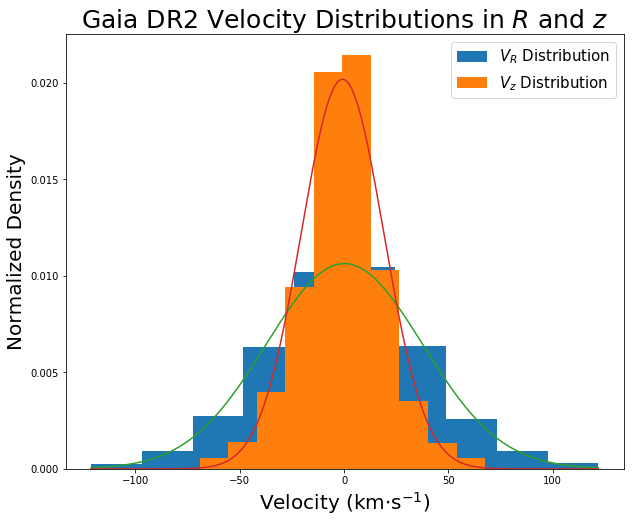

In [5]:
x = np.linspace(np.min(gvR), np.max(gvR), 10000)
gvR_normal = stats.norm.pdf(x, np.mean(gvR), np.std(gvR))
gvz_normal = stats.norm.pdf(x, np.mean(gvz), np.std(gvz))

plt.figure(figsize=(10,8))

plt.hist(gvR, normed=True,label='$V_R$ Distribution')
plt.hist(gvz, normed=True,label='$V_z$ Distribution')
plt.plot(x, gvR_normal)
plt.plot(x, gvz_normal)

plt.title("Gaia DR2 Velocity Distributions in $R$ and $z$",fontsize=25)
plt.xlabel("Velocity (km$\cdot$s$^{-1}$)",fontsize=20)
plt.ylabel("Normalized Density",fontsize=20)
plt.legend(fontsize=15)

plt.show()

In [6]:
test_dehnen = rect_to_cyl(*load_samples(5000, [0, 0.1], r_range=[7.5, 8.5]).T)

In [7]:
tvR, tvz = test_dehnen.T[[1,4]]

tmask = (np.abs(tvR-np.mean(tvR)) < 3*np.std(tvR)) & (np.abs(tvz-np.mean(tvz)) < 3*np.std(tvz))

tvR = tvR[tmask]
tvz = tvz[tmask]

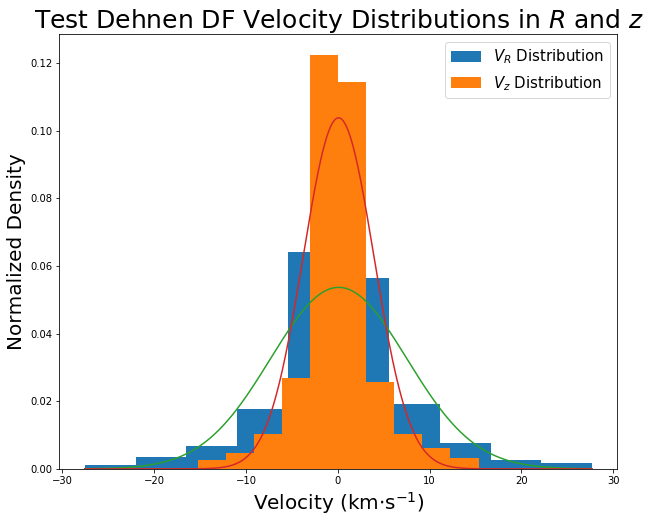

In [8]:
x = np.linspace(np.min(tvR), np.max(tvR), 10000)
tvR_normal = stats.norm.pdf(x, np.mean(tvR), np.std(tvR))
tvz_normal = stats.norm.pdf(x, np.mean(tvz), np.std(tvz))

plt.figure(figsize=(10,8))

plt.hist(tvR, normed=True,label='$V_R$ Distribution')
plt.hist(tvz, normed=True,label='$V_z$ Distribution')
plt.plot(x, tvR_normal)
plt.plot(x, tvz_normal)

plt.title("Test Dehnen DF Velocity Distributions in $R$ and $z$",fontsize=25)
plt.xlabel("Velocity (km$\cdot$s$^{-1}$)",fontsize=20)
plt.ylabel("Normalized Density",fontsize=20)
plt.legend(fontsize=15)

plt.show()